## Importing Packages and Reading in Our Data

In [ ]:
!pip install statsmodels==0.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 28.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [ ]:
all_boros = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [ ]:
all_boros.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50048586,BILL'S NEW YORK CITY,Manhattan,57,EAST 54 STREET,10022.0,2125182727,American,11/20/2017,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Initial Inspection,40.760097,-73.973129,105.0,4.0,10200.0,1035765.0,1.012900e+09,MN17
1,50071467,TGA NYC,Manhattan,320,WEST 36 STREET,10018.0,2126514842,American,10/17/2018,Violations were cited in the following area(s).,...,03/23/2022,Smoke-Free Air Act / Initial Inspection,40.753817,-73.993362,104.0,3.0,11100.0,1090332.0,1.007590e+09,MN13
2,41617347,DUNKIN,Bronx,1090,MORRIS PARK AVENUE,10461.0,7189750433,Donuts,08/09/2019,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Initial Inspection,40.849397,-73.853349,211.0,13.0,25400.0,2094972.0,2.041080e+09,BX37
3,41617347,DUNKIN,Bronx,1090,MORRIS PARK AVENUE,10461.0,7189750433,Donuts,08/09/2019,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Initial Inspection,40.849397,-73.853349,211.0,13.0,25400.0,2094972.0,2.041080e+09,BX37
4,41663033,EL ENCANTO CENTRO-AMERICANO RESTAURANT,Queens,14912,JAMAICA AVENUE,11435.0,7182629799,Latin American,10/27/2021,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Initial Inspection,40.701927,-73.805260,412.0,27.0,21200.0,4213989.0,4.099970e+09,QN61


In [ ]:
all_boros.describe()

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,3.291200e+05,324134.000000,313863.000000,328798.000000,328798.000000,323336.000000,323344.000000,323344.000000,3.218360e+05,3.283100e+05
mean,4.678720e+07,10677.296874,20.566136,40.114857,-72.822943,247.970622,19.843758,28918.519141,2.504562e+06,2.394332e+09
std,4.268035e+06,594.918080,15.001747,4.972157,9.025715,130.144938,15.612370,30400.496597,1.345513e+06,1.339081e+09
min,3.007544e+07,7004.000000,0.000000,0.000000,-74.249101,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.153216e+07,10022.000000,11.000000,40.687500,-73.988483,106.000000,4.000000,8100.000000,1.045313e+06,1.010570e+09
50%,5.003290e+07,10468.000000,16.000000,40.735445,-73.956162,301.000000,19.000000,16800.000000,3.004031e+06,3.000350e+09
75%,5.006992e+07,11229.000000,26.000000,40.763188,-73.896591,401.000000,34.000000,40300.000000,4.002112e+06,4.001640e+09
max,5.012055e+07,20147.000000,157.000000,40.912822,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [ ]:
all_boros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329120 entries, 0 to 329119
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  329120 non-null  int64  
 1   DBA                    327829 non-null  object 
 2   BORO                   329120 non-null  object 
 3   BUILDING               328537 non-null  object 
 4   STREET                 329108 non-null  object 
 5   ZIPCODE                324134 non-null  float64
 6   PHONE                  329092 non-null  object 
 7   CUISINE DESCRIPTION    325162 non-null  object 
 8   INSPECTION DATE        329120 non-null  object 
 9   ACTION                 325163 non-null  object 
 10  VIOLATION CODE         321466 non-null  object 
 11  VIOLATION DESCRIPTION  323448 non-null  object 
 12  CRITICAL FLAG          329120 non-null  object 
 13  SCORE                  313863 non-null  float64
 14  GRADE                  166354 non-nu

## Question 1: Which NYC boroughs have the highest and lowest mean inspection scores? Is there a significant difference in mean inspection scores among the different boroughs?

In [ ]:
all_boros_cleaned = all_boros[all_boros['BORO'] != '0']
borough_scores = all_boros_cleaned.groupby('BORO')['SCORE'].mean()
sorted_borough_scores = borough_scores.sort_values()
sorted_borough_scores

BORO
Staten Island    18.984829
Bronx            20.292123
Manhattan        20.396744
Queens           20.696078
Brooklyn         21.022755
Name: SCORE, dtype: float64

### Q1 Visualizations - Bar Chart & Boxplot

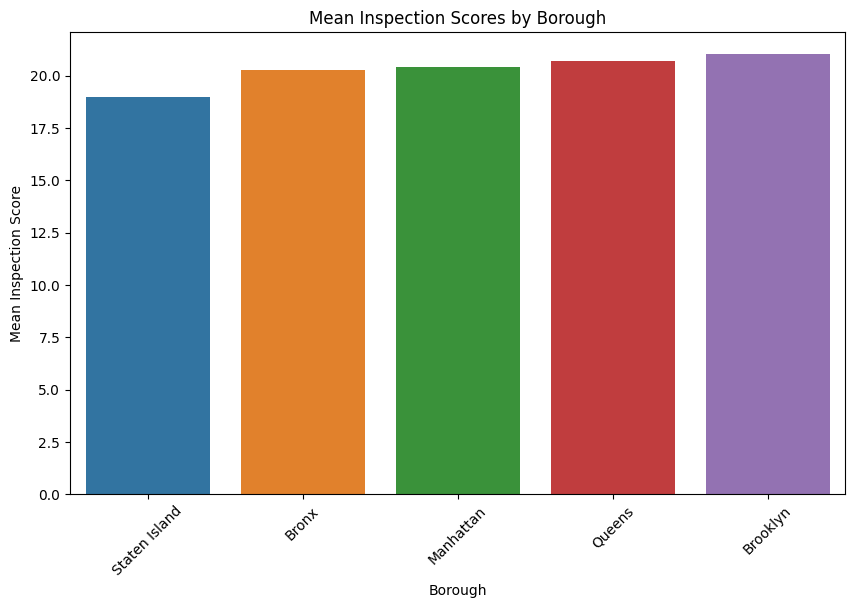

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_borough_scores.index, y=sorted_borough_scores.values)
plt.title('Mean Inspection Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean Inspection Score')
plt.xticks(rotation=45)
plt.show()

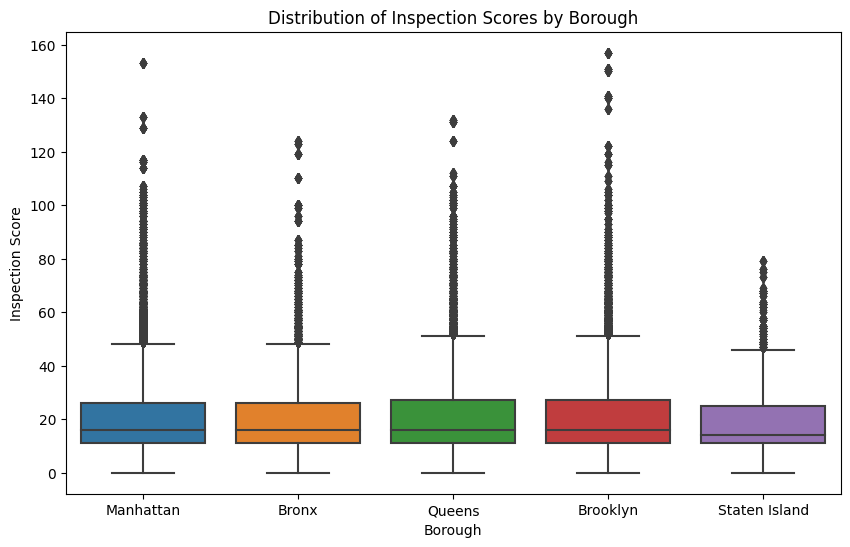

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BORO', y='SCORE', data= all_boros_cleaned)
plt.title('Distribution of Inspection Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Inspection Score')
plt.show()

### Q1 Statistical Analysis - ANOVA

In [ ]:
model = ols('SCORE ~ BORO', data=all_boros_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Interpret the results
alpha = 0.05  # significance level
p_value = anova_table['PR(>F)'][0]

print("P_value: " , p_value)



                sum_sq        df          F        PR(>F)
BORO      4.791267e+04       4.0  53.268585  6.004322e-45
Residual  7.055794e+07  313781.0        NaN           NaN
P_value:  6.004321833706301e-45


## Question 2: Which months have the highest and lowest mean inspection scores? Is there a significant difference in mean inspection scores across months? 

In [ ]:
# Converting dates to datetime objects and creating month column
all_boros['INSPECTION DATE'] = all_boros['INSPECTION DATE'].apply(pd.to_datetime)
all_boros['INSPECTION_MONTH'] = all_boros['INSPECTION DATE'].dt.strftime('%B')

# Grouping inspection scores by month  
monthly_scores = all_boros.groupby('INSPECTION_MONTH')['SCORE'].mean()
sorted_monthly_scores = monthly_scores.sort_values()
sorted_monthly_scores


INSPECTION_MONTH
May          18.434248
April        18.772970
June         19.771281
February     20.010390
March        20.296808
January      20.385485
December     20.532248
July         21.002418
November     21.499528
September    21.600795
August       21.692108
October      22.114146
Name: SCORE, dtype: float64

### Q2 Visualizations - Bar Chart & Boxplot

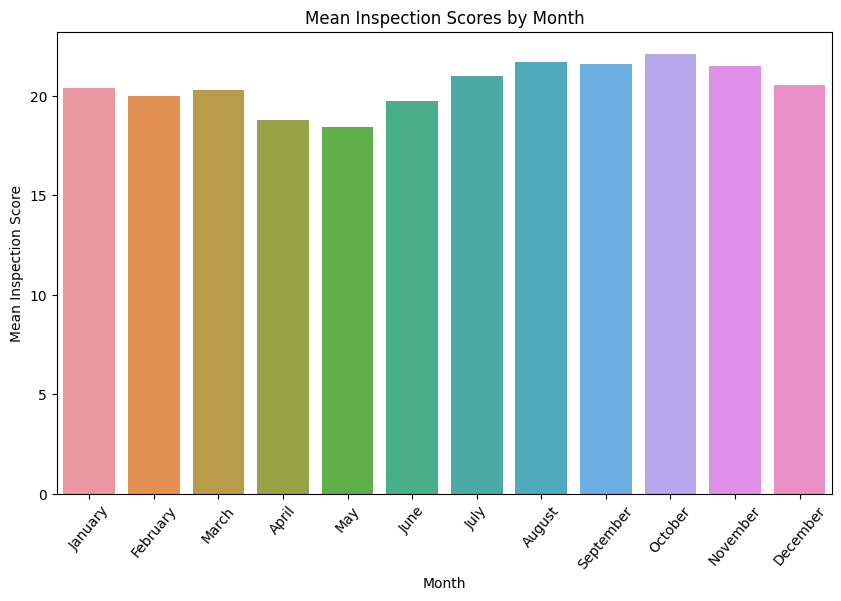

In [ ]:
# Bar Chart
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_monthly_scores.index, y=sorted_monthly_scores.values, order=custom_order)
plt.title('Mean Inspection Scores by Month')
plt.xlabel('Month')
plt.ylabel('Mean Inspection Score')
plt.xticks(rotation=50)
plt.show()

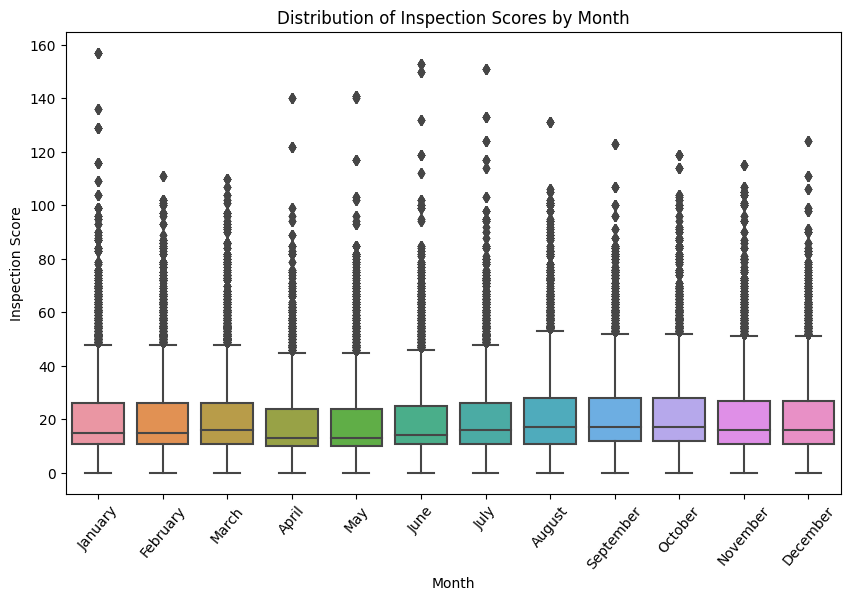

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='INSPECTION_MONTH', y='SCORE', data= all_boros, order=custom_order)
plt.title('Distribution of Inspection Scores by Month')
plt.xlabel('Month')
plt.ylabel('Inspection Score')
plt.xticks(rotation=50)
plt.show()

### Q2 Statistical Analysis - ANOVA

In [ ]:
# Create the model
model = ols('SCORE ~ INSPECTION_MONTH', data=all_boros).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

# Interpret the results
alpha = 0.05  # significance level
p_value = anova_table['PR(>F)'][0]

print("P_value: ", p_value)

                        sum_sq        df           F         PR(>F)
INSPECTION_MONTH  3.399211e+05      11.0  137.969037  2.976227e-318
Residual          7.029548e+07  313851.0         NaN            NaN
P_value:  2.976227e-318


## Question 3: How Do Inspection Scores Vary Across Time For the Top 10 Most Common Cuisines?

In [ ]:
# Calculate the frequency of each cuisine
cuisine_counts = all_boros['CUISINE DESCRIPTION'].value_counts()

# Select the top 10 most common cuisines
top_10_cuisines = cuisine_counts.head(10).index.tolist()

# Create a new DataFrame with only the top 10 most common cuisines
top_10_df = all_boros[all_boros['CUISINE DESCRIPTION'].isin(top_10_cuisines)].copy()

top_10_df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,INSPECTION_MONTH
0,50048586,BILL'S NEW YORK CITY,Manhattan,57,EAST 54 STREET,10022.0,2125182727,American,2017-11-20,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.760097,-73.973129,105.0,4.0,10200.0,1035765.0,1.012900e+09,MN17,November
1,50071467,TGA NYC,Manhattan,320,WEST 36 STREET,10018.0,2126514842,American,2018-10-17,Violations were cited in the following area(s).,...,Smoke-Free Air Act / Initial Inspection,40.753817,-73.993362,104.0,3.0,11100.0,1090332.0,1.007590e+09,MN13,October
4,41663033,EL ENCANTO CENTRO-AMERICANO RESTAURANT,Queens,14912,JAMAICA AVENUE,11435.0,7182629799,Latin American,2021-10-27,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.701927,-73.805260,412.0,27.0,21200.0,4213989.0,4.099970e+09,QN61,October
5,50004496,TAQUERIA EL PUENTE,Brooklyn,9300,5 AVENUE,11209.0,7189212580,Mexican,2019-09-09,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.616723,-74.030314,310.0,43.0,5800.0,3155308.0,3.061080e+09,BK31,September
7,50014424,EL COYOTE,Queens,70-09,AUSTIN STREET,11375.0,7182680777,Mexican,2018-03-01,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.720827,-73.846602,406.0,29.0,71100.0,4077481.0,4.032380e+09,QN17,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329112,41130663,ROSA'S CAFE,Queens,30-03,38 AVENUE,11101.0,7187847906,Spanish,2019-03-15,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.754127,-73.932656,401.0,26.0,5100.0,4430653.0,4.003720e+09,QN68,March
329114,50115959,SOHO ROOM,Manhattan,201,SPRING STREET,10012.0,9738654093,American,2021-11-03,Violations were cited in the following area(s).,...,Pre-permit (Non-operational) / Initial Inspection,40.725288,-74.003449,102.0,3.0,4900.0,1007815.0,1.005040e+09,MN24,November
329115,50093803,COFFEE MONSTER,Queens,15708,NORTHERN BLVD,11354.0,9179080334,Coffee/Tea,2019-12-03,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.763722,-73.808049,407.0,20.0,117100.0,4119352.0,4.052760e+09,QN51,December
329116,41648461,TROPIC POLLO,Queens,9059,CORONA AVENUE,11373.0,7185921868,Latin American,2019-03-07,No violations were recorded at the time of thi...,...,Administrative Miscellaneous / Initial Inspection,40.742442,-73.873697,404.0,25.0,47100.0,4039574.0,4.015860e+09,QN29,March


In [ ]:
cuisine_counts

American          61608
Chinese           33609
Pizza             20288
Coffee/Tea        16093
Latin American    14445
                  ...  
Czech                20
Basque               10
Lebanese              8
Armenian              3
New French            3
Name: CUISINE DESCRIPTION, Length: 87, dtype: int64

### Q3 Visualization - Line Plot

In [ ]:
top_10_df['INSPECTION_YEAR'] = all_boros['INSPECTION DATE'].dt.year

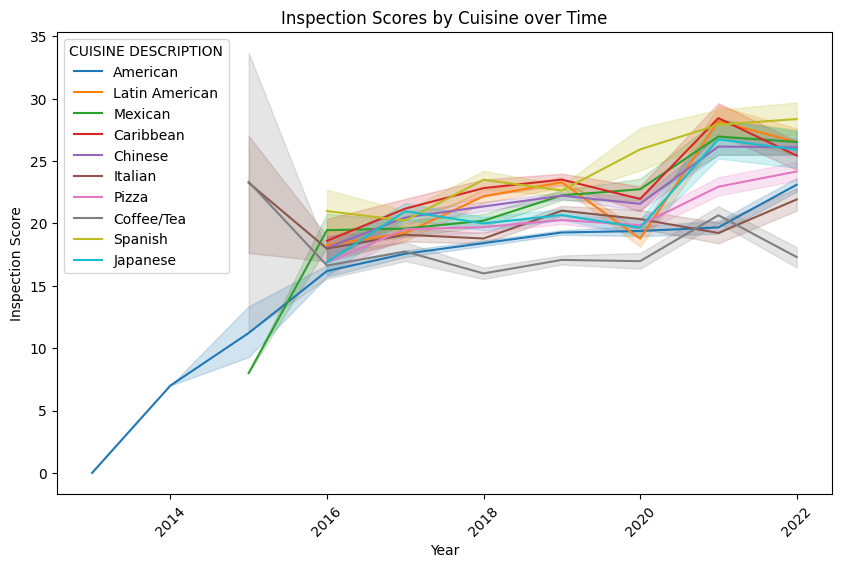

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = top_10_df, x = 'INSPECTION_YEAR', y = 'SCORE' , hue= 'CUISINE DESCRIPTION')
plt.title('Inspection Scores by Cuisine over Time')
plt.xlabel('Year')
plt.ylabel('Inspection Score')
plt.xticks(rotation=45)
plt.show()

## Question 4: What is the Relationship between Violation Code and Boroughs?

### Q4 Statistical Analysis - Chi-Squared Test

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(all_boros_cleaned['VIOLATION CODE'], all_boros_cleaned['BORO'])

In [ ]:
#Create contingency table 

chi2, p, dof, ex = chi2_contingency(contingency_table)
print("degree of freedom = ",dof)
print("chi2 = ", chi2)
print("p-val = ", p)


degree of freedom =  416
chi2 =  3687.205557513539
p-val =  0.0


### Q4 Visualization - HeatMap

Text(0.5, 1.0, 'Contingency Table: Violation Code vs. Boroughs')

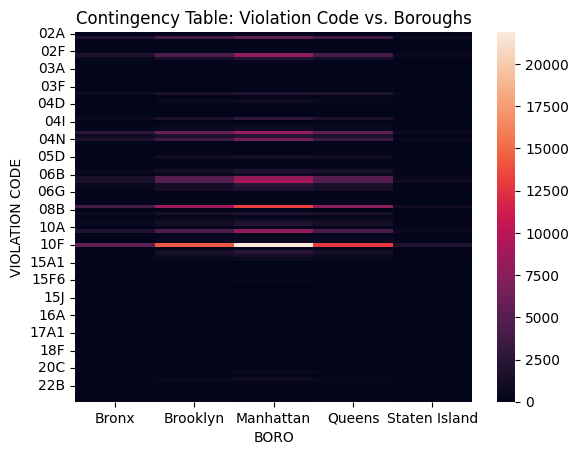

In [ ]:
sns.heatmap(contingency_table)
plt.title('Contingency Table: Violation Code vs. Boroughs')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbaa8ac7-de07-4042-a8b8-66c4fae25bd9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>